In [2]:
from collections import Counter
from matplotlib import pyplot as plt
from __future__ import division
import math
import random

In [58]:
num_friends = [100, 49, 41, 40, 25, 1, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 6, 6, 7, 7, 7, 8, 8, 10, 11, 11, 12, 12,
               15, 15, 15, 18, 20, 20]

daily_min = [1, 39, 37, 35, 28, 7, 9, 8, 7, 8, 10, 11, 12, 9, 13, 15, 14, 14, 17, 16, 15, 19, 16, 21, 17, 19, 22, 18, 21, 20, 24, 23, 22, 25,
               25, 27, 29, 28, 30, 32]

print len(num_friends)
print len(daily_min)


40
40


outlier - um dado fora do padrao

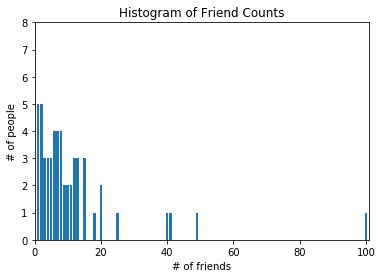

In [12]:
friend_counts = Counter(num_friends)
xs = range(101) # largest value is 100
ys = [friend_counts[x] for x in xs] # height is just # of friends
plt.bar(xs, ys)
plt.axis([0, 101, 0, 8])
plt.title("Histogram of Friend Counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [15]:
num_points = len(num_friends)
largest_value = max(num_friends) # 100
smallest_value = min(num_friends)

sorted_values = sorted(num_friends)
smallest_value2 = sorted_values[0] # 1
second_smallest_value = sorted_values[9] # 1
second_largest_value = sorted_values[-2] # 49

In [16]:
print "Tamanho base",num_points
print "Maior amigos",largest_value
print "Menor amigos",smallest_value

print "#################"

print "Menor",smallest_value2
print "Decima menor",second_smallest_value
print "Segunda maior",second_largest_value

Tamanho base 54
Maior amigos 100
Menor amigos 1
#################
Menor 1
Decima menor 2
Segunda maior 49


In [18]:
def media(x):
    return sum(x) / len(x)

print "Media Amigos",media(num_friends)

Media Amigos 11.6296296296


In [20]:
def mediana(v):
    """finds the 'middle-most' value of v"""
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    if n % 2 == 1:
        # if odd, return the middle value
        return sorted_v[midpoint]
    else:
        # if even, return the average of the middle values
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2
    
    
print "Mediana Amigos",mediana(num_friends)

Mediana Amigos 7.5


In [23]:
def quantile(x, p):
    """returns the pth-percentile value in x"""
    p_index = int(p * len(x))
    return sorted(x)[p_index]

print quantile(num_friends, 0.10) # 1
print quantile(num_friends, 0.25) # 3
print quantile(num_friends, 0.75) # 9
print quantile(num_friends, 0.90) # 13

2
4
13
20


In [26]:
def mode(x):
    """returns a list, might be more than one mode"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.iteritems()
                if count == max_count]

print mode(num_friends)

[1]


In [27]:
def data_range(x):
    return max(x) - min(x)

print data_range(num_friends) # 99

99


In [34]:
def de_mean(x):
    """translate x by subtracting its mean (so the result has mean 0)"""
    x_bar = media(x)
    return [x_i - x_bar for x_i in x]

def sum_of_squares(x):
    return sum([x_i * x_i for x_i in x])

def variance(x):
    """assumes x has at least two elements"""
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n -1)


variance(num_friends) # 81.54

247.13801537386445

In [32]:
def standard_deviation(x):
    return math.sqrt(variance(x))

standard_deviation(num_friends) # 9.03

15.720623886279592

In [39]:
notas = [
    [5,8,10,7],
    [8,6,6,10],
    [10,9,5,10],
    [8,10,9,4]
]



for nota in notas:
    print "Variancia",variance(nota)
    print "Desvio padrao",standard_deviation(nota)
    print "###################"

Variancia 4.33333333333
Desvio padrao 2.08166599947
###################
Variancia 3.66666666667
Desvio padrao 1.91485421551
###################
Variancia 5.66666666667
Desvio padrao 2.38047614285
###################
Variancia 6.91666666667
Desvio padrao 2.62995563968
###################


In [51]:
def dot(v, w):
    return sum(vi * wi for vi, wi in zip(v, w))

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)


covariance(num_friends, daily_min)

34.39937106918238

In [52]:
def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    if stdev_x > 0 and stdev_y > 0:
        return covariance(x, y) / stdev_x / stdev_y
    else:
        return 0 # if no variation, correlation is zero
    
    
correlation(num_friends, daily_min) # 0.25

0.14260017781840087

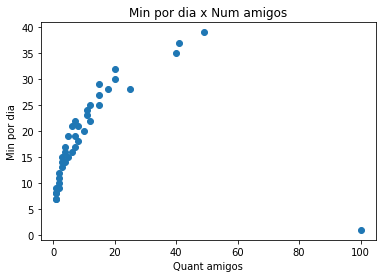

In [59]:
plt.scatter(num_friends, daily_min)
plt.title("Min por dia x Num amigos")
plt.xlabel("Quant amigos")
plt.ylabel("Min por dia")
plt.show()

In [60]:
outlier = num_friends.index(100) # index of outlier
num_friends_good = [x
            for i, x in enumerate(num_friends)
                    if i != outlier]
daily_minutes_good = [x
            for i, x in enumerate(daily_min)
                    if i != outlier]

correlation(num_friends_good, daily_minutes_good)

0.9014335836717391

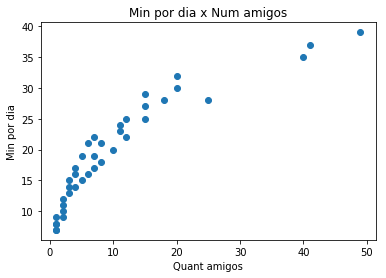

In [61]:
plt.scatter(num_friends_good, daily_minutes_good)
plt.title("Min por dia x Num amigos")
plt.xlabel("Quant amigos")
plt.ylabel("Min por dia")
plt.show()

In [62]:
print "Com outlier",correlation(num_friends, daily_min)
print "sem outlier",correlation(num_friends_good, daily_minutes_good)

Com outlier 0.275550391268
sem outlier 0.901433583672
